# Training Models

## Linear Regression
Linear Regression Equation - $ \hat{y} = \theta_0 + \theta_1 x_1 + ...+\theta_n x_n$

In this equation:
* ŷ is the predicted value.
* n is the number of features.
* $x_i$ is the ith feature value.
* $θ_j$ is the jth model parameter (including the bias term θ0 and the feature weights $θ_1, θ_2, ..., θ_n)$.

Vectorized Linear Regression Eqn - $\hat{y} = h_\theta(x) = \theta.X$

In this equation:
* θ is the model’s parameter vector, containing the bias term $θ_0$ and the feature weights $θ_1$ to $θ_n$.
* x is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
* $θ · X$ is the dot product of the vectors θ and x, which is of course equal to $θ_0 x_0 + θ_1 x_1 + ... + θ_n x_n$.
* $h_θ$ is the hypothesis function, using the model parameters θ.

MSE cost function for Linear Regression model <br>
$ MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})^2$

### The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation <br>
$\hat{\theta} = (X^T X)^{-1} X^T y$

In this equation:
* $\hat{\theta}$ is the value of θ that minimizes the cost function.
* y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.


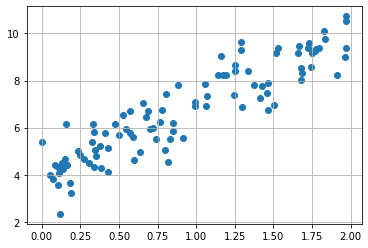

In [64]:
# Let’s generate some linear-looking data to test this equation
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.grid()
plt.show()

In [65]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
# inv() to calculate inverse and .dot() for matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.98110009]
 [2.97465505]]


In [66]:
# let's make some predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.98110009],
       [9.93041018]])

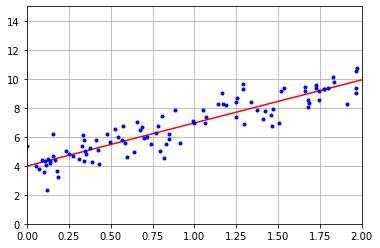

In [67]:
# plotting the regression line
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [68]:
# LINEAR REGRESSION with SCIKIT LEARN
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"lin_reg.intercept_, lin_reg.coef_ = {lin_reg.intercept_, lin_reg.coef_}")
print(f"lin_reg.predict(X_new) - {lin_reg.predict(X_new)}")

lin_reg.intercept_, lin_reg.coef_ = (array([3.98110009]), array([[2.97465505]]))
lin_reg.predict(X_new) - [[3.98110009]
 [9.93041018]]


The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

In [69]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.98110009],
       [2.97465505]])

This function computes θ = $X^+$y, where $X^+$ is the pseudoinverse of X (specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [70]:
np.linalg.pinv(X_b).dot(y)

array([[3.98110009],
       [2.97465505]])

## Gradient Descent


### Batch Gradient Descent
Partial Derivative of cost function<br>
$\frac{\partial }{\partial \theta_j} MSE(\theta = \frac{2}{m} \sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})x_j^{(i)})$

Gradient Descent Step<br>
$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$

It involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets. However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

Let’s look at a quick implementation of this algorithm:


In [71]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)    

[[3.98110009]
 [2.97465505]]


In [72]:
# let's try with different leraning rates

etas = [0.002, # too small, takes too many iterations to converge
        0.1,  # just right
        0.5   # too large, will jump around
        ]

n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization
for eta in etas:
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
    print(f"eta: {eta} \ntheta = {theta}\n\n")

eta: 0.002 
theta = [[3.25313941]
 [3.63230152]]


eta: 0.1 
theta = [[3.98110009]
 [2.97465505]]


eta: 0.5 
theta = [[3.98110009]
 [2.97465505]]




### Stochastic Gradient descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.

Stochastic Gradient Descent using a simple learning schedule:

In [73]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    """ Used to decrease lr"""
    return t0 / (t + t1)
    
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)


[[4.0302585 ]
 [2.95585978]]


To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3).

In [74]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.96133949] [2.97373929]


### Mini Batch Gradient Descent
At each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.


## Polynomial Regression 
What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

Let's look at an example:


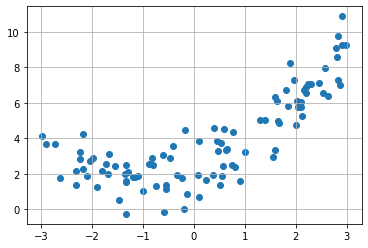

In [75]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly nomialFeatures class to transform our training data, adding the square (second degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.8747498]
[-0.8747498  0.7651872]


X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data 

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.24333671] [[0.92305153 0.47212725]]


In [78]:
# prediction on first 5 train samples
lin_reg.predict(np.squeeze([np.c_[a, a**2] for a in X[:5]]))

array([[1.7971633 ],
       [3.65865155],
       [1.94704741],
       [2.39415553],
       [1.81685899]])

## Regularized Linear Models
A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce
the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

### Ridge Regression
Ridge Regression is a regularized version of Linear Regression: a regularization term equal to $\alpha \sum_{i=1}^{n} \theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

Cost Function: <br>
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$

Bias term $\theta_0$ is not regularized.

Ridge Regression Closed Form: <br>
$\hat{\theta} = (X^T X + \alpha A)^{-1} X^T y$

Lets look at an example, using normal form:

In [79]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.25288096]])

In [80]:
# Example using SGD
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.24486247])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge Regression.

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

Cost Function:<br>
$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} |\theta_i|$

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). In other words, **Lasso Regression automatically performs feature selection and outputs a sparse model** (i.e., with few nonzero feature weights). 

Let's have a look at an example:

In [81]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.21448093])

In [82]:
# Example using SGD
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.2412248])

### Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

Cost Function: <br>
$ J(\theta) = MSE(\theta) 
+ r \alpha \sum_{i=1}^n |\theta_i|
+ \frac{1-r}{2}\alpha \sum_{i=1}^{n} |\theta_i|$

Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):


In [83]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.21300664])

### Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Here is an example:
```Python
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline(
    [
     ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
     ("std_scaler", StandardScaler())
    ]
)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, 
                       tol=-np.infty, 
                       warm_start=True, 
                       penalty=None, 
                       learning_rate="constant", 
                       eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
```

Note that with warm_start=True, when the fit() method is called it continues train‐ ing where it left off, instead of restarting from scratch.

## Logistic Regression
Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.


### Estimating Probabilities
Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. 

Logistic Regression model estimated probability:<br>
$\hat{p} = h_\theta (x) = \sigma(x^T \theta)$

$\sigma(.)$ is sigmod function that outputs a number between 0 and 1.

Logistic Function:<br>
$\sigma(t) =  \frac{1}{1 + \exp^{(-t)}}$

Once the Logistic Regression model has estimated the probability $\hat{p}= h_θ(x)$ that an instance x belongs to the positive class, it can make its prediction ŷ easily.

Logistic Regression model prediction:<br>
$\hat{y} = \left\{ \begin{array}{rl}
 0 &\mbox{ if $\hat{p}$ < 0.5 } \\
 1 &\mbox{ if $\hat{p} \geq $  0.5 }
\end{array} \right. $

σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if x⊺ θ is positive and 0 if it is negative.

### Training and Cost Function
The objective of Logistic Regression training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This idea is captured by the cost function for a single training instance x.

Cost Function of single training instance:<br>
$
c(\theta) = \left\{ 
    \begin{array}{rl}
        -log(\hat{p}) &\mbox{ if y = 1 } \\
        -log(1-\hat{p}) &\mbox{ if y = 0 }
    \end{array} \right. 
$

This cost function makes sense because –log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, –log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the log loss.

Log Loss: <br>
$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)} log(\hat{p}^{(i)}) + (1-y^{(i)}) log(1-\hat{p}^{(i)})]$

The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).

Logistic cost function partial derivatives: <br>
$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^T x^{(i)}) - y^{(i)})x_j^{(i)}$

For each instance it computes the prediction error and multiplies it by the $j^{th}$ feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm.

### Decision Boundaries
Let’s use the iris dataset to illustrate Logistic Regression and try to build a classifier to detect the Iris virginica type based only on the petal width feature. 

In [84]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())
print(iris['DESCR'])
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [85]:
# logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

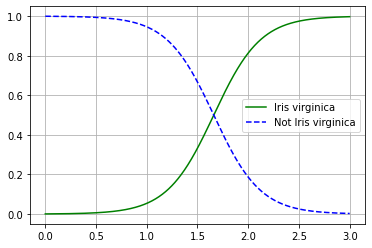

In [86]:
# model’s estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()
plt.grid()
plt.show()

### Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

When given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation for Linear Regression prediction 

Softmax score for class k:<br>
$s_k(x) = x^T \theta^{(k)}$

Each class has its own dedicated parameter vector $θ^{(k)}$. All these vectors are typically stored as rows in a parameter matrix Θ.

Once you have computed the score of every class for the instance x, you can estimate the probability pk that the instance belongs to class k by running the scores through the softmax function. The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Softmax Function:<br>
$\hat{p} = \sigma(s(x))_k = \frac{\exp{(s_k(x))}}{\sum_{j=1}^K \exp{(s_k(x))}}$

In this Equation:
* K is the number of classes.
* s(x) is a vector containing the scores of each class for the instance x.
* $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k, given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability.

Softmax Regression classifier prediction:<br>
$\hat{y} = \underset{k}{argmax} \sigma(s(x))_k = \underset{k}{argmax} s(x)_k = \underset{k}{argmax} ((\theta^{(k)})^Tx)$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma(s(x))_k$.

The objective of Softmax Regression is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Cross entropy Cost function:<br>
$J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^{K} y_k^{(i)} log(\hat{p}_k^{(i)})$

Here, $y_k^{(i)}$ is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not. When K=2, this cost function is equivalent to the Logistic Regression’s cost function.

Cross entropy gradient vector for class k:<br>
$ \nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m}\sum_{i=1}^m (\hat{p}_k^{(i)} - y_k^{(i)})x^{(i)}$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. ScikitLearn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multino mial" to switch it to Softmax Regression. You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for more details). It also applies ℓ2 regularization by default, which you can control using the hyperparameter C:

In [87]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Predict petal 5cm long 2cm wide
print(f"class - {softmax_reg.predict([[5, 2]])}")
print(f"Probabs - {softmax_reg.predict_proba([[5, 2]])}")

class - [2]
Probabs - [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
